# Importing required Libraries and the Dataset.

In [5]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows use of Display() for Dataframes.

# Import supplementary visualization code visuals.py
import visuals as vs

%matplotlib inline 

data = pd.read_csv("autism_data.csv")
display(data.head(700))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,1,1,0,0,1,1,0,0,...,m,Latino,no,no,Brazil,yes,5.0,18 and more,Parent,NO
696,1,1,1,1,1,1,0,1,1,1,...,m,Turkish,no,yes,Australia,no,9.0,18 and more,Self,YES
697,1,1,1,1,1,0,0,0,0,1,...,f,Asian,no,no,Philippines,no,6.0,18 and more,Self,NO
698,1,1,1,1,1,1,1,1,1,1,...,f,Pasifika,no,no,Australia,no,10.0,18 and more,Self,YES


In [6]:
# Total number of records:
n_records = len(data.index)

# Total number of records with ASD 
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals with ASD
yes_percentage = float((n_asd_yes) / n_records * 100)

# Printing the outputs
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')
print("Percentage of individuals with ASD : {:.2f}%".format(yes_percentage))

Total number of records  : 704
Number of individuals with ASD : 189
Number of individuals without ASD : 515
Percentage of individuals with ASD : 26.85%


## Featureset Exploration 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [8]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


## Preparing the Data 

In [9]:
data.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

##### Dropping missing values 

In [10]:
data.dropna(inplace=True)
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [11]:
# After Data Cleaning

# Total number of records:
n_records = len(data.index)

# Total number of records with ASD 
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Printing the outputs
print("AFTER REMOVING NULL VALUES : ")
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')


AFTER REMOVING NULL VALUES : 
Total number of records  : 702
Number of individuals with ASD : 189
Number of individuals without ASD : 513


### Visualizations with Seaborn

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

Number of rows in the dataset: 702


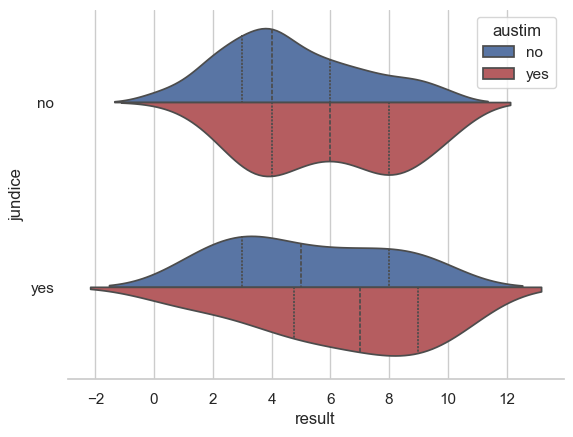

In [13]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jundice", hue="austim", data=data, split=True,inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)
print(f"Number of rows in the dataset: {len(data)}")


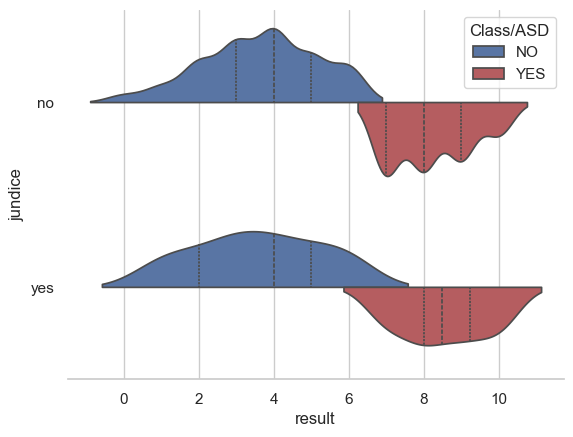

In [14]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jundice", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

Number of rows in the dataset: 702


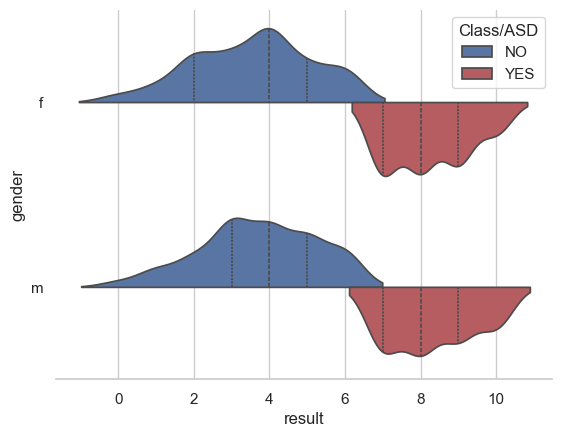

In [15]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="gender", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)
print(f"Number of rows in the dataset: {len(data)}")


Number of rows in the dataset: 702


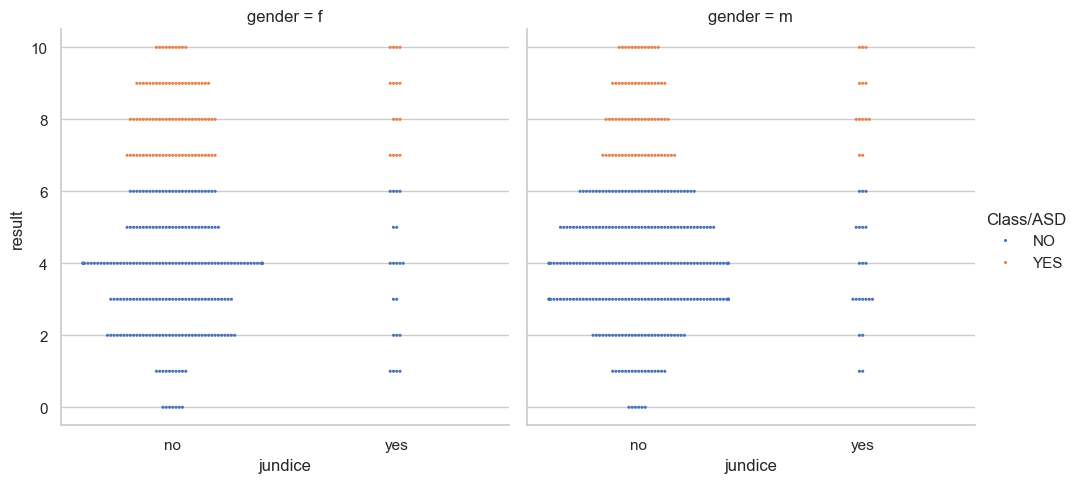

In [16]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", s = 5, col="gender", data=data, kind="swarm");
print(f"Number of rows in the dataset: {len(data)}")


Convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).

In [17]:
data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Data Preprocessing : using MinMaxScaler()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = ['age','result']
features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[num ] = scaler.fit_transform(features_raw[num])

In [19]:
display(features_minmax_transform.head(699))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
4,0.062842,f,?,no,no,Egypt,0.2,?,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.038251,m,Turkish,no,yes,Australia,0.9,Self,1,1,1,1,1,1,0,1,1,1
697,0.079235,f,Asian,no,no,Philippines,0.6,Self,1,1,1,1,1,0,0,0,0,1
698,0.027322,f,Pasifika,no,no,Australia,1.0,Self,1,1,1,1,1,1,1,1,1,1
699,0.021858,f,White-European,no,no,Russia,0.7,Self,0,1,0,1,1,0,1,1,1,1


### One-Hot Encoding on features_minmax_transform

In [20]:
features_final = pd.get_dummies(features_minmax_transform)
features_final.head(5)
print(f"Number of rows in features_final: {features_final.shape[0]}")

Number of rows in features_final: 702


### Encode all classes data to numerical values

In [21]:
data_classes = data_raw.apply(lambda x : 1 if x == 'YES' else 0)

In [22]:
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)

103 total features after one-hot encoding
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_?', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Cos

Text(0, 0.5, 'Frequency')

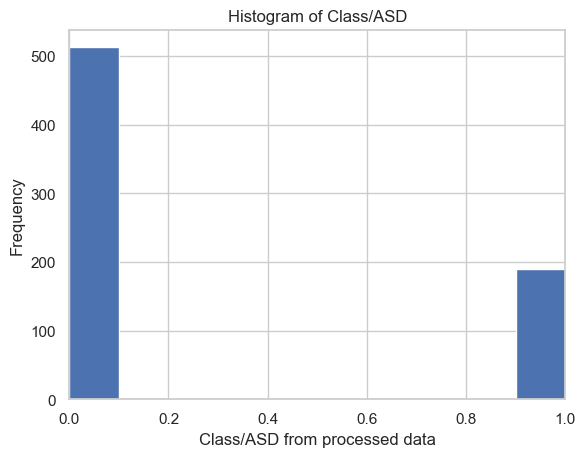

In [23]:
plt.hist(data_classes, bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

## Shuffle and Split the data
All the categorical variables have been converted to numerical variables and have been normalized, we split the data into train and test set, test set will be 20% of the total data.

In [24]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(features_final,data_classes,test_size=0.2, random_state=1)
print("Train set has {} enteries.".format(X_train.shape[0]))
print("Test set has {} enteries.".format(X_test.shape[0]))

Train set has 561 enteries.
Test set has 141 enteries.


## Models :

### 1. SVM

Final Evaluation Metrics:
Accuracy: 0.74
Precision: 0.51
Recall: 0.63
F1 Score: 0.56


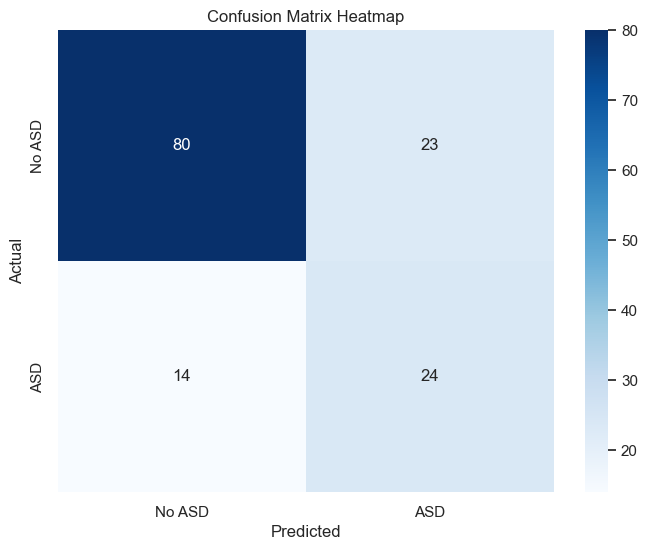

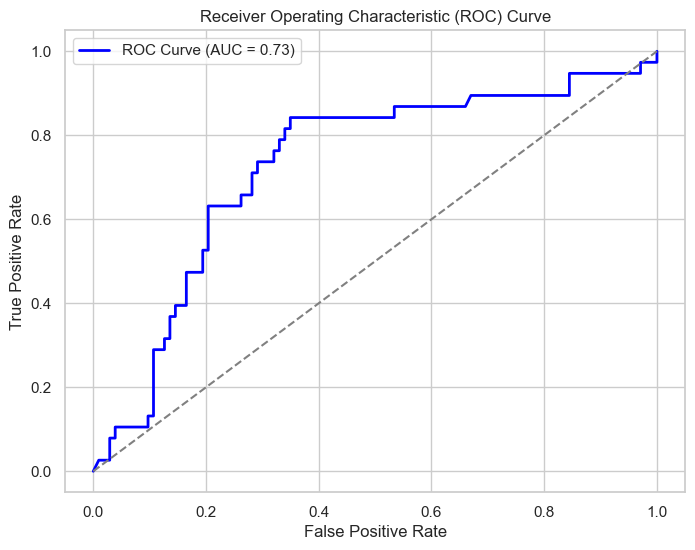

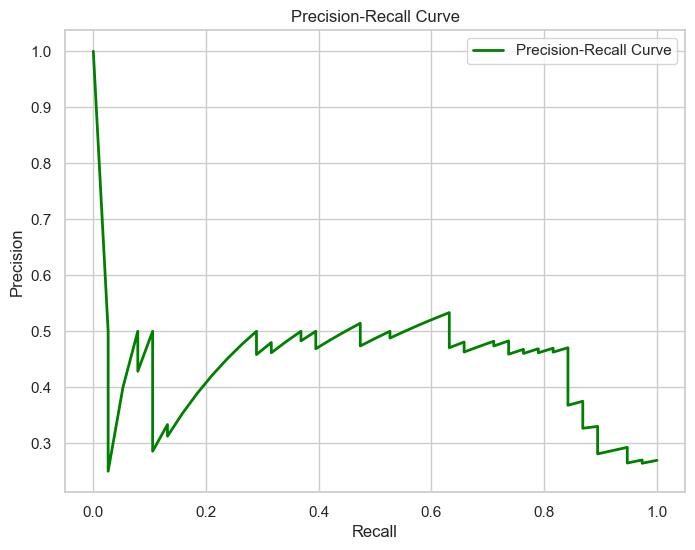


Cross-Validated F1 Scores: [0.71657754 0.72727273 0.82285714 0.79120879 0.82162162]
Mean F1 Score: 0.775907564613447

Best Parameters from Grid Search: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Evaluation Metrics for Best Model:
Accuracy: 0.73
Precision: 0.50
Recall: 0.55
F1 Score: 0.53


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE


data = pd.read_csv("autism_data.csv")


X = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
          'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 
          'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 
          'A9_Score', 'A10_Score']]
y = data['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


categorical_cols = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'relation']
numerical_cols = ['age']


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)


svm_pipeline = Pipeline(steps=[
    ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True))
])


svm_pipeline.fit(X_train_resampled, y_train_resampled)


y_pred = svm_pipeline.predict(X_test_preprocessed)
y_pred_prob = svm_pipeline.predict_proba(X_test_preprocessed)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Final Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green', lw=2, label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


cv_scores = cross_val_score(svm_pipeline, X_train_resampled, y_train_resampled, cv=5, scoring="f1")
print("\nCross-Validated F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1],
    'classifier__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(svm_pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

print("\nBest Parameters from Grid Search:", grid_search.best_params_)
best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test_preprocessed)
y_pred_best_prob = best_model.predict_proba(X_test_preprocessed)[:, 1]

print("\nEvaluation Metrics for Best Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.2f}")


global y_test_svm, y_pred_prob_svm, acc_svm, prec_svm, rec_svm, f1_svm
y_test_svm = y_test
y_pred_prob_svm = best_model.predict_proba(X_test_preprocessed)[:, 1]
acc_svm = accuracy_score(y_test, y_pred_best)
prec_svm = precision_score(y_test, y_pred_best)
rec_svm = recall_score(y_test, y_pred_best)
f1_svm = f1_score(y_test, y_pred_best)



### 2. xgBoost


Class distribution before SMOTE:
Class/ASD
0    412
1    151
Name: count, dtype: int64

Class distribution after SMOTE:
Class/ASD
0    412
1    192
Name: count, dtype: int64

Cross-Validation F1 Scores: [0.96103896 0.89156627 0.90909091 0.91891892 0.88571429]
Mean F1 Score: 0.91
[0]	validation_0-logloss:0.56905
[1]	validation_0-logloss:0.54977
[2]	validation_0-logloss:0.53460
[3]	validation_0-logloss:0.52009
[4]	validation_0-logloss:0.50543
[5]	validation_0-logloss:0.49211
[6]	validation_0-logloss:0.47711
[7]	validation_0-logloss:0.46353
[8]	validation_0-logloss:0.45189
[9]	validation_0-logloss:0.44157
[10]	validation_0-logloss:0.43062
[11]	validation_0-logloss:0.42079
[12]	validation_0-logloss:0.41218
[13]	validation_0-logloss:0.40319
[14]	validation_0-logloss:0.39548
[15]	validation_0-logloss:0.38664
[16]	validation_0-logloss:0.38119
[17]	validation_0-logloss:0.37426
[18]	validation_0-logloss:0.36756
[19]	validation_0-logloss:0.35902
[20]	validation_0-logloss:0.35233
[21]	validation

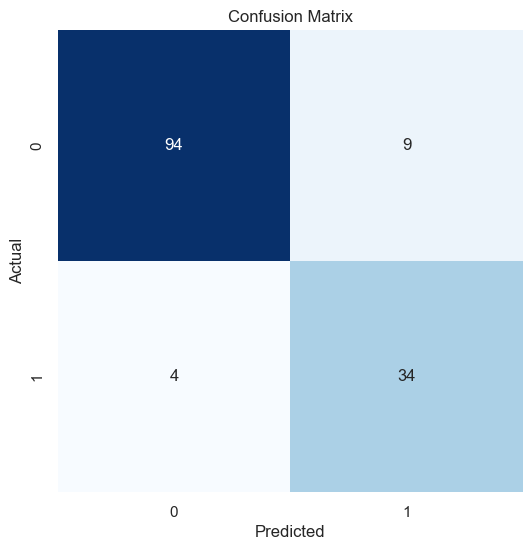

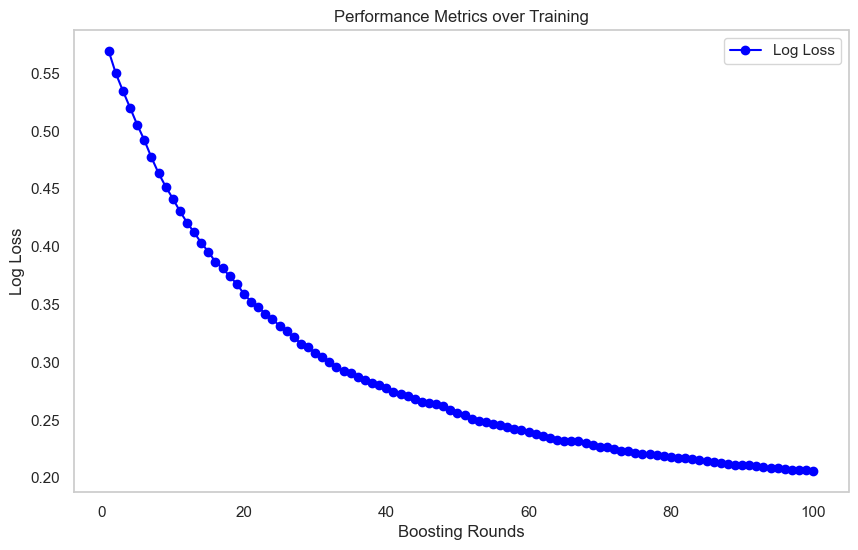

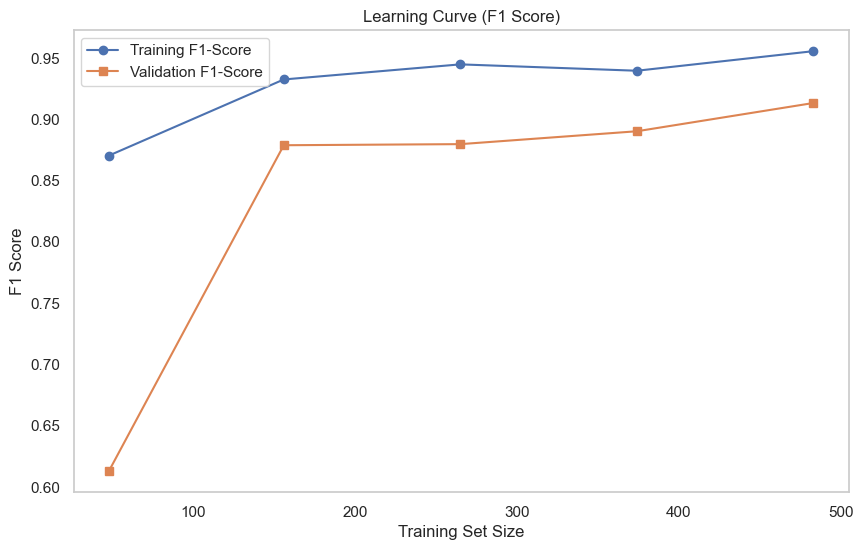

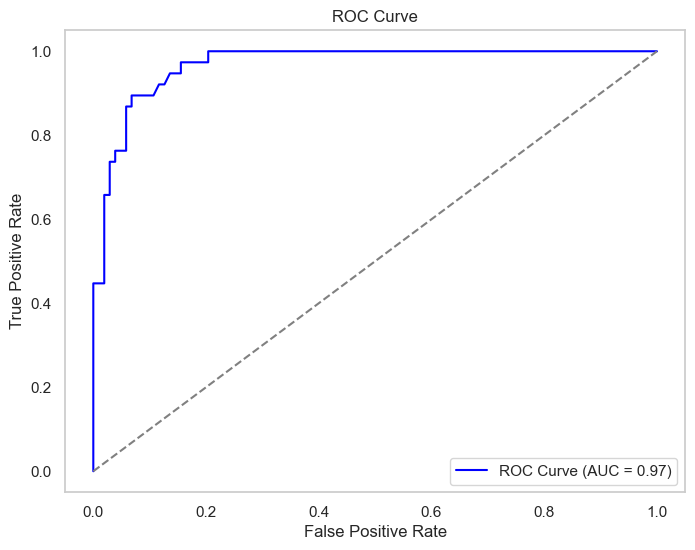

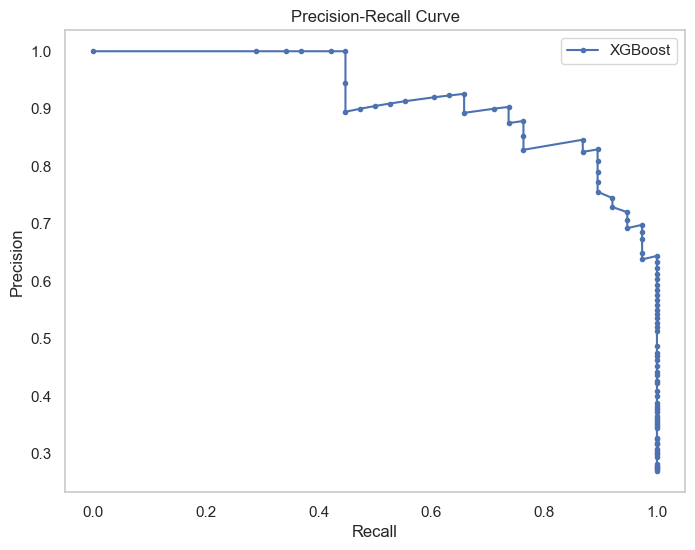

<Figure size 1000x600 with 0 Axes>

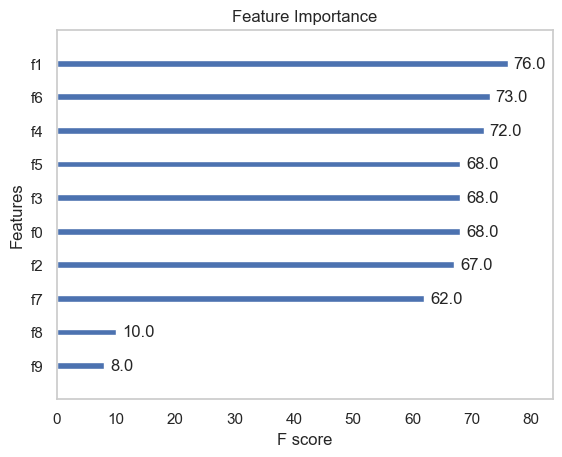

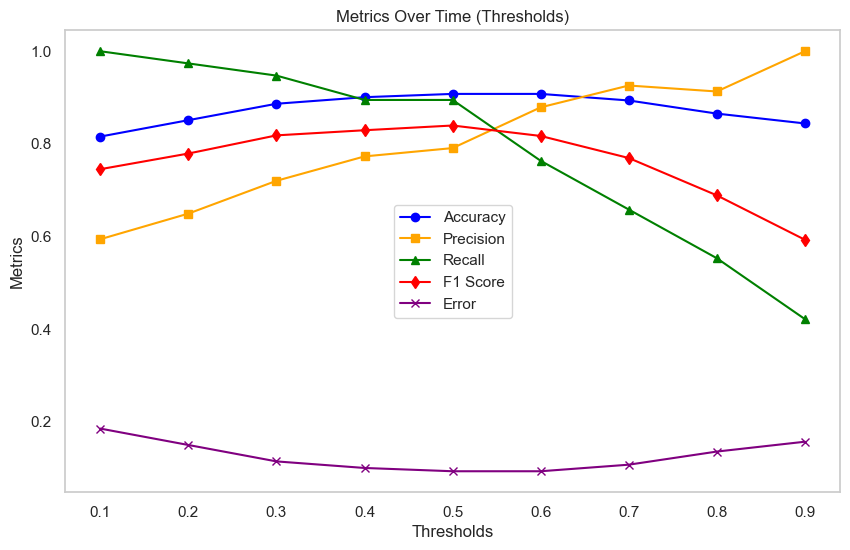

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import (f1_score, precision_score, recall_score, accuracy_score, 
                             confusion_matrix, roc_curve, auc, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv("autism_data.csv")

data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
                     'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
                     'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
                     'A9_Score', 'A10_Score']]


data_classes = data_raw.map({'YES': 1, 'NO': 0})

features_final = pd.get_dummies(features_raw)

features_final.fillna(features_final.mean(numeric_only=True), inplace=True)  
for col in features_final.select_dtypes(include=['object']).columns:
    features_final[col].fillna(features_final[col].mode()[0], inplace=True)


assert 'Class/ASD' not in features_final.columns


X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    data_classes,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=data_classes)

print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

minority_class_size = y_train.value_counts().min()
majority_class_size = y_train.value_counts().max()
smote_ratio = minority_class_size / majority_class_size 

smote = SMOTE(sampling_strategy=min(0.5, smote_ratio + 0.1), random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())


rfe = RFE(estimator=XGBClassifier(random_state=42), n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = rfe.transform(X_test)

xgb_model = XGBClassifier(
    objective="binary:logistic",
    max_depth=3,  
    learning_rate=0.05,
    n_estimators=100, 
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5, 
    reg_lambda=1.0,
    eval_metric="logloss",
    random_state=42
)

# Cross-validation to evaluate model performance
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_resampled, cv=5, scoring="f1")
print(f"\nCross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.2f}")


xgb_model.fit(
    X_train_selected, 
    y_train_resampled, 
    eval_set=[(X_test_selected, y_test)],  
    verbose=True
)

y_pred = xgb_model.predict(X_test_selected)
y_pred_proba = xgb_model.predict_proba(X_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nFinal Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


iterations = np.arange(1, len(xgb_model.evals_result()['validation_0']['logloss']) + 1)
logloss_values = xgb_model.evals_result()['validation_0']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(iterations, logloss_values, label='Log Loss', color='blue', marker='o')
plt.xlabel("Boosting Rounds")
plt.ylabel("Log Loss")
plt.title("Performance Metrics over Training")
plt.legend()
plt.grid()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train_selected, y_train_resampled, cv=5, scoring="f1"
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training F1-Score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation F1-Score", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve (F1 Score)")
plt.legend()
plt.grid()
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker='.', label='XGBoost')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10)  
plt.title("Feature Importance")
plt.grid()
plt.show()



def calculate_metrics_over_time(y_true, y_pred_proba, thresholds):
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'error': []
    }

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        metrics['accuracy'].append(accuracy_score(y_true, y_pred))
        metrics['precision'].append(precision_score(y_true, y_pred, zero_division=0))
        metrics['recall'].append(recall_score(y_true, y_pred))
        metrics['f1_score'].append(f1_score(y_true, y_pred))
        metrics['error'].append(1 - accuracy_score(y_true, y_pred))

    return metrics


def plot_metrics_over_time(metrics, thresholds):
    plt.figure(figsize=(10, 6))

    plt.plot(thresholds, metrics['accuracy'], label='Accuracy', marker='o', color='blue')
    plt.plot(thresholds, metrics['precision'], label='Precision', marker='s', color='orange')
    plt.plot(thresholds, metrics['recall'], label='Recall', marker='^', color='green')
    plt.plot(thresholds, metrics['f1_score'], label='F1 Score', marker='d', color='red')
    plt.plot(thresholds, metrics['error'], label='Error', marker='x', color='purple')

    plt.xlabel('Thresholds')
    plt.ylabel('Metrics')
    plt.title('Metrics Over Time (Thresholds)')
    plt.legend()
    plt.grid()
    plt.show()


thresholds = np.linspace(0.1, 0.9, 9) 
metrics = calculate_metrics_over_time(y_test, y_pred_proba, thresholds) 

plot_metrics_over_time(metrics, thresholds)

global y_test_xgb, y_pred_prob_xgb, acc_xgb, prec_xgb, rec_xgb, f1_xgb
y_test_xgb = y_test
y_pred_prob_xgb = y_pred_proba
acc_xgb = accuracy
prec_xgb = precision
rec_xgb = recall
f1_xgb = f1


### 3. Decision Tress


Class distribution before SMOTE:
Class/ASD
0    412
1    151
Name: count, dtype: int64

Class distribution after SMOTE:
Class/ASD
0    412
1    329
Name: count, dtype: int64
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Cross-Validation F1 Scores: [0.92537313 0.90909091 0.9037037  0.91603053 0.89552239]
Mean F1 Score: 0.91

Final Evaluation Metrics:
Accuracy: 0.88
Precision: 0.74
Recall: 0.84
F1 Score: 0.79


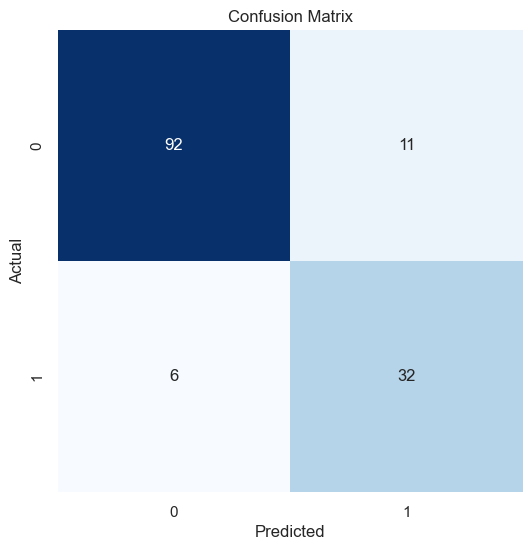

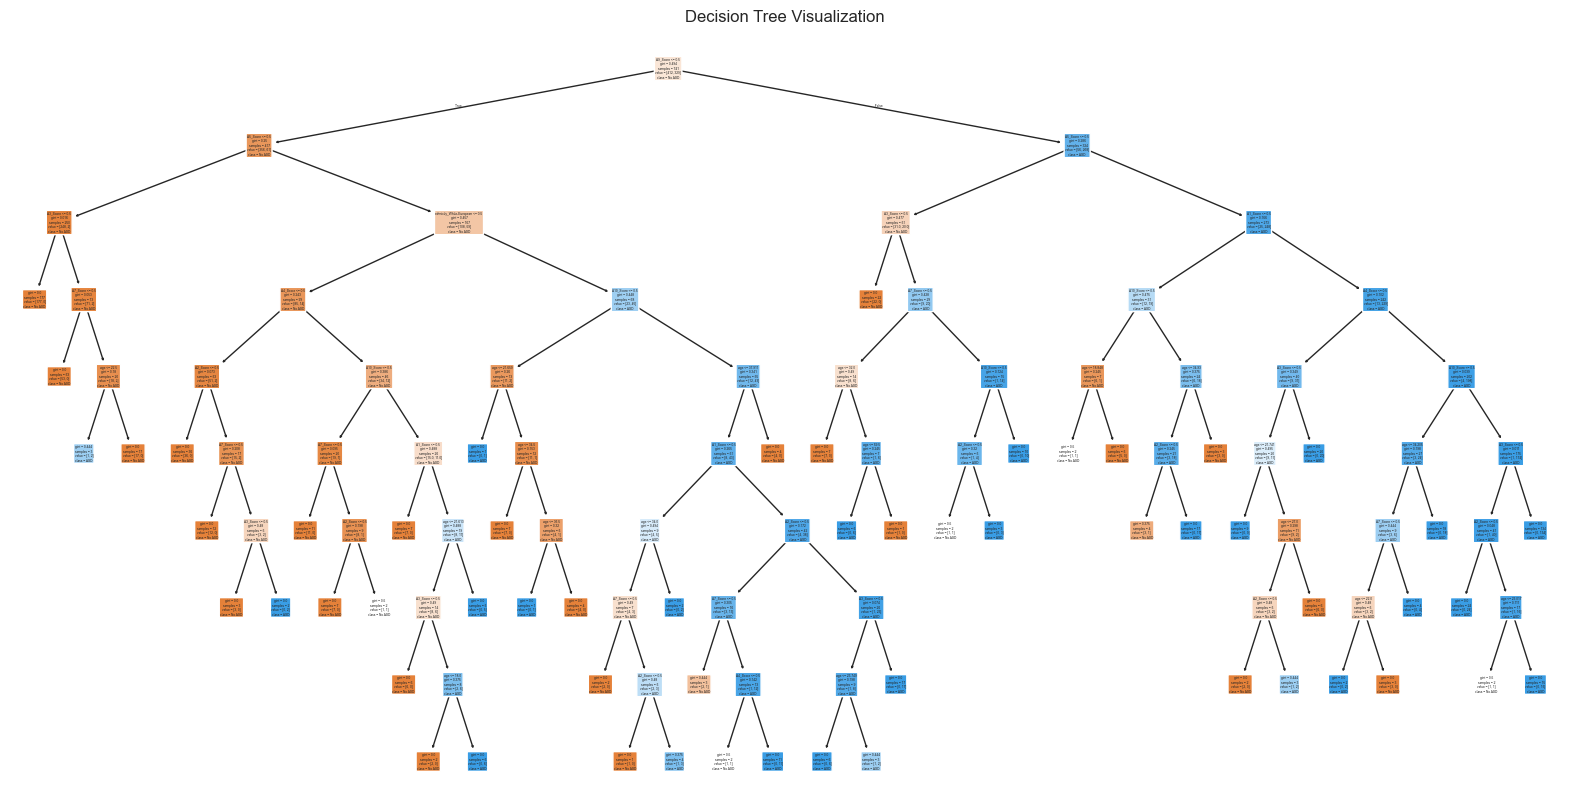

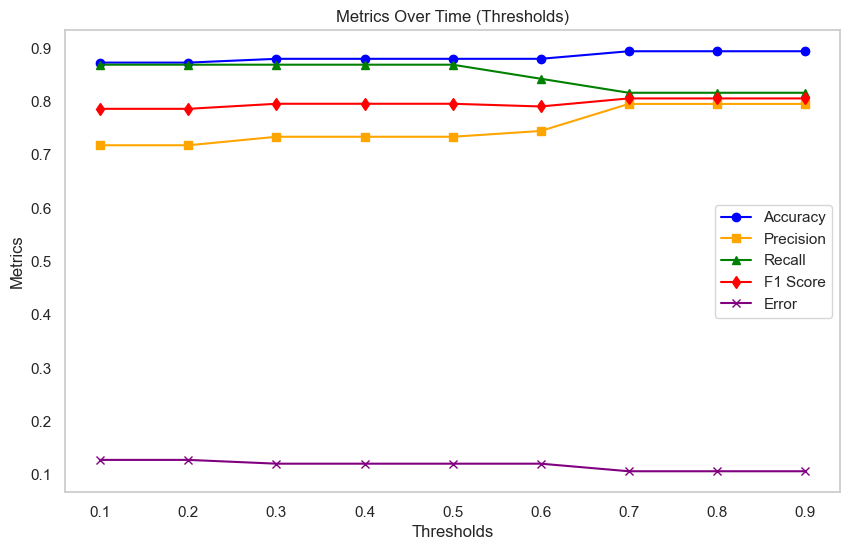

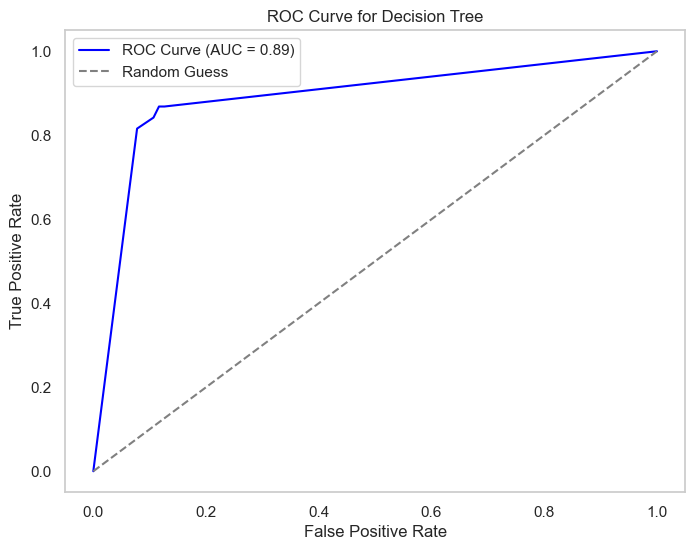

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import (f1_score, precision_score, recall_score, accuracy_score,
                             confusion_matrix, roc_curve, auc, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE


data = pd.read_csv("autism_data.csv")


data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
                     'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
                     'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
                     'A9_Score', 'A10_Score']]


data_classes = data_raw.map({'YES': 1, 'NO': 0})


features_final = pd.get_dummies(features_raw)


features_final.fillna(features_final.mean(numeric_only=True), inplace=True)
for col in features_final.select_dtypes(include=['object']).columns:
    features_final[col].fillna(features_final[col].mode()[0], inplace=True)


assert 'Class/ASD' not in features_final.columns


X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    data_classes,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=data_classes)


print("\nClass distribution before SMOTE:")
print(y_train.value_counts())


smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Balanced ratio
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())


rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = rfe.transform(X_test)


param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5
)
grid_search.fit(X_train_selected, y_train_resampled)
best_dt_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


cv_scores = cross_val_score(best_dt_model, X_train_selected, y_train_resampled, cv=5, scoring="f1")
print(f"\nCross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.2f}")


best_dt_model.fit(X_train_selected, y_train_resampled)


y_pred = best_dt_model.predict(X_test_selected)
y_pred_proba = best_dt_model.predict_proba(X_test_selected)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nFinal Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(best_dt_model,
          feature_names=rfe.get_feature_names_out(),
          class_names=["No ASD", "ASD"],
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


def calculate_metrics_over_time(y_true, y_pred_proba, thresholds):
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'error': []
    }

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        metrics['accuracy'].append(accuracy_score(y_true, y_pred))
        metrics['precision'].append(precision_score(y_true, y_pred))
        metrics['recall'].append(recall_score(y_true, y_pred))
        metrics['f1_score'].append(f1_score(y_true, y_pred))
        metrics['error'].append(1 - accuracy_score(y_true, y_pred))

    return metrics

def plot_metrics_over_time(metrics, thresholds):
    plt.figure(figsize=(10, 6))

    plt.plot(thresholds, metrics['accuracy'], label='Accuracy', marker='o', color='blue')
    plt.plot(thresholds, metrics['precision'], label='Precision', marker='s', color='orange')
    plt.plot(thresholds, metrics['recall'], label='Recall', marker='^', color='green')
    plt.plot(thresholds, metrics['f1_score'], label='F1 Score', marker='d', color='red')
    plt.plot(thresholds, metrics['error'], label='Error', marker='x', color='purple')

    plt.xlabel('Thresholds')
    plt.ylabel('Metrics')
    plt.title('Metrics Over Time (Thresholds)')
    plt.legend()
    plt.grid()
    plt.show()

thresholds = np.linspace(0.1, 0.9, 9)  
metrics = calculate_metrics_over_time(y_test, y_pred_proba, thresholds)  

plot_metrics_over_time(metrics, thresholds)  



fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend()
plt.grid()
plt.show()






global y_test_dt, y_pred_prob_dt, acc_dt, prec_dt, rec_dt, f1_dt
y_test_dt = y_test
y_pred_prob_dt = y_pred_proba
acc_dt = accuracy
prec_dt = precision
rec_dt = recall
f1_dt = f1



In [28]:

global y_test_dt, y_pred_prob_dt, acc_dt, prec_dt, rec_dt, f1_dt, dt_feature_importance


y_pred_prob_dt = best_dt_model.predict_proba(X_test_selected)[:, 1]
y_pred_dt = best_dt_model.predict(X_test_selected)


acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)


dt_results = {
    'y_test': y_test,
    'y_proba': y_pred_prob_dt,
    'accuracy': acc_dt,
    'precision': prec_dt,
    'recall': rec_dt,
    'f1': f1_dt,
    'name': 'Decision Tree',

}


### 4. Random Forest

Mean Accuracy: 0.94
Mean Precision: 0.93
Mean Recall: 0.84
Mean F1 Score: 0.87


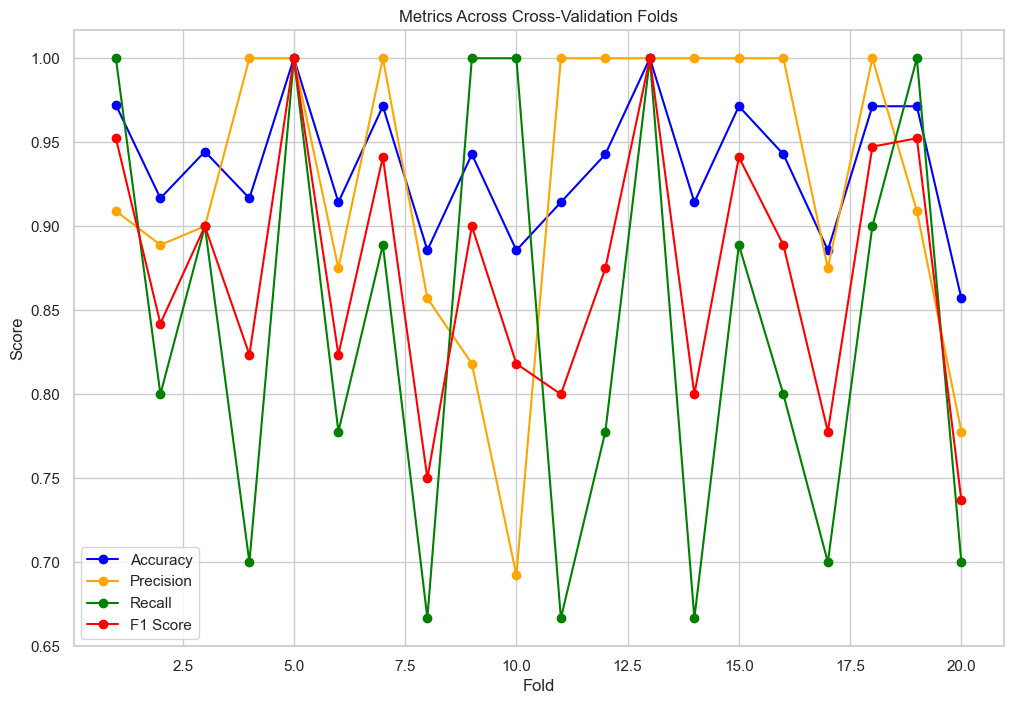


Metric Standard Deviations:
Accuracy: 0.0392
Precision: 0.0882
Recall: 0.1276
F1: 0.0786


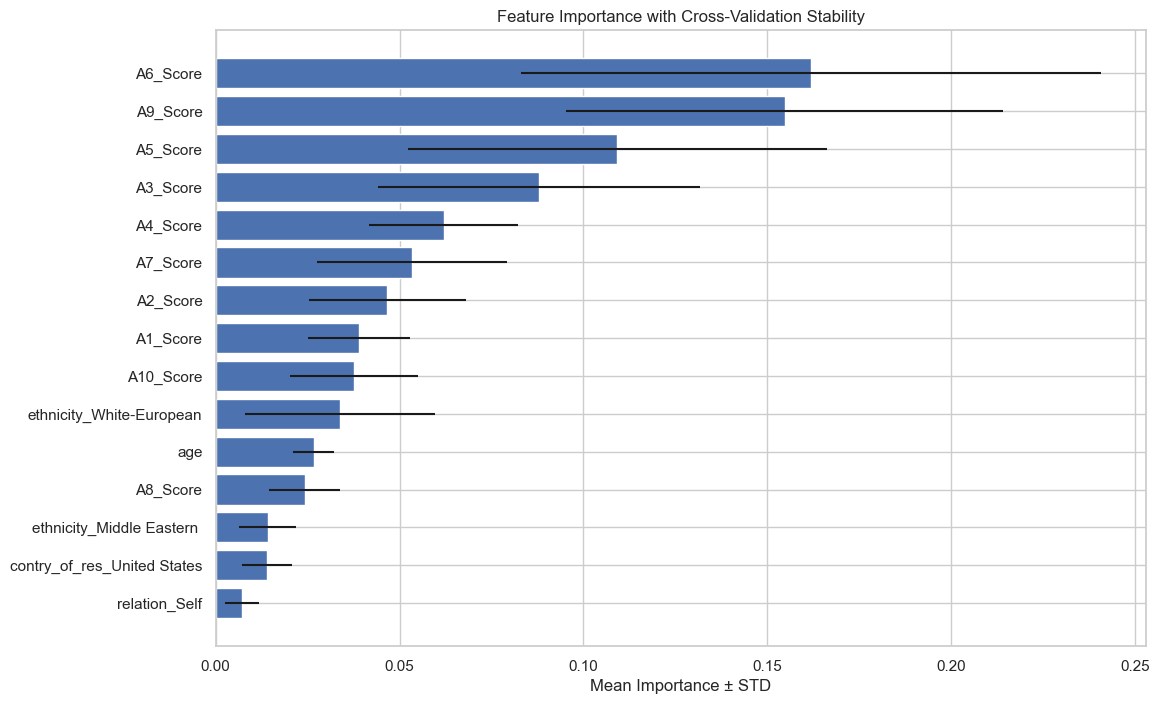

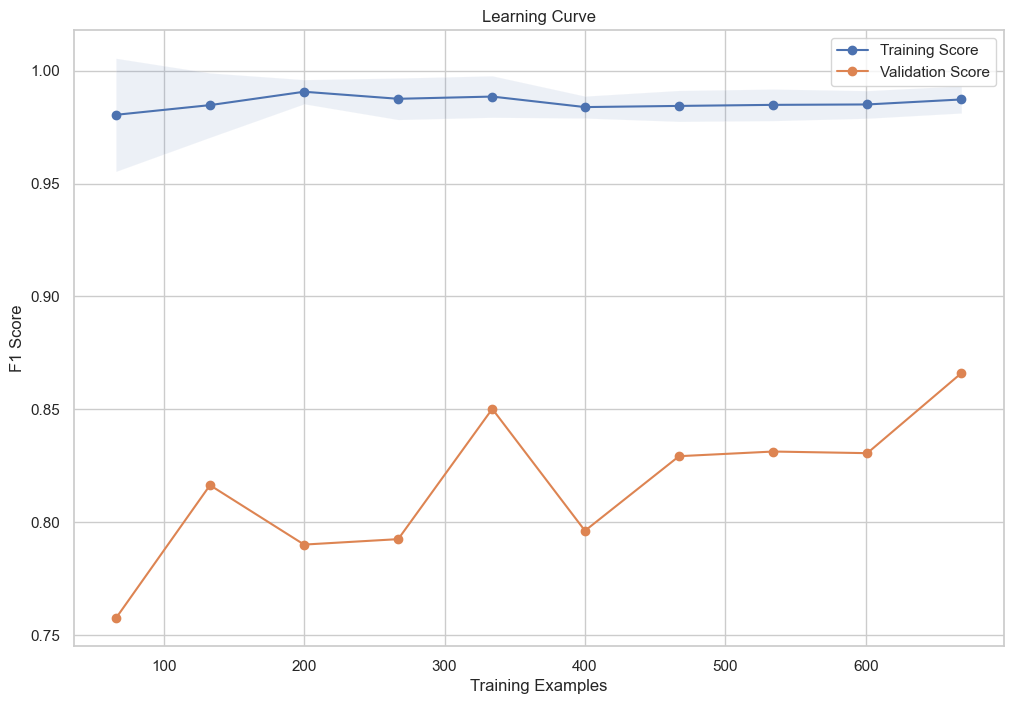


Data Integrity Checks:
- No NaNs: True
- Target ratio preserved: True


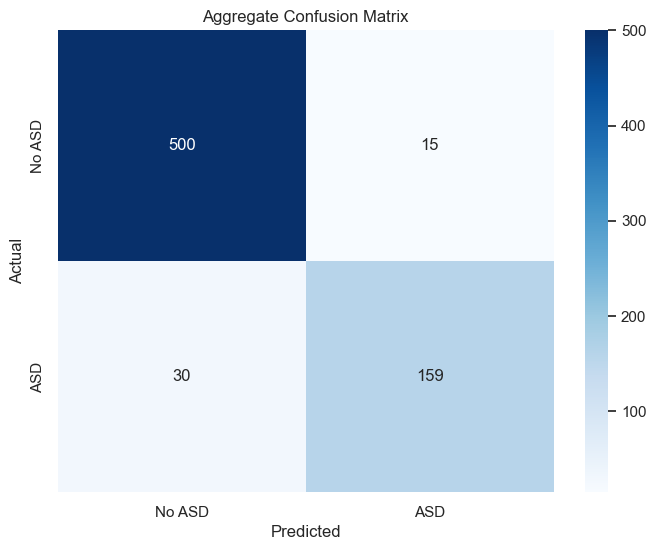

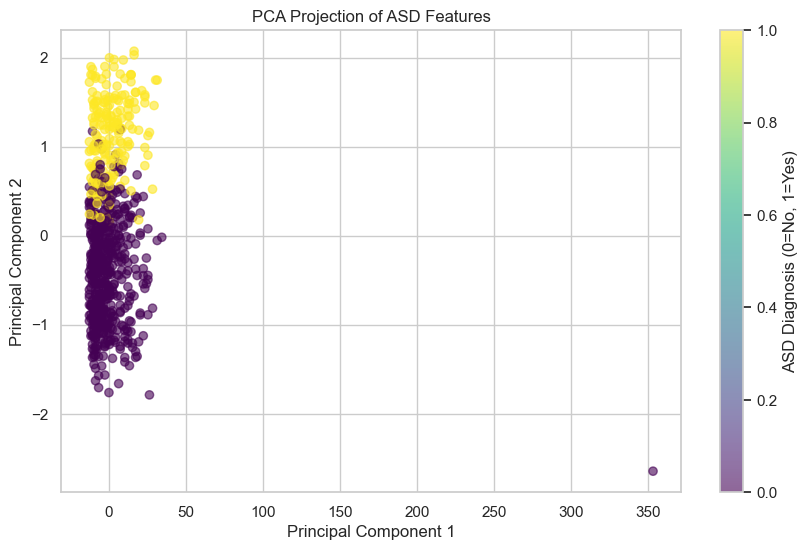

In [29]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, f1_score, accuracy_score, precision_score, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=5, random_state=1))
])


cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)


fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for train_idx, test_idx in cv.split(features_final.values, data_classes.values):

    X_train_fold = features_final.values[train_idx]
    y_train_fold = data_classes.values[train_idx]
    X_test_fold = features_final.values[test_idx]
    y_test_fold = data_classes.values[test_idx]
    

    pipeline.fit(X_train_fold, y_train_fold)
    

    y_pred_fold = pipeline.predict(X_test_fold)
    

    fold_accuracies.append(accuracy_score(y_test_fold, y_pred_fold))
    fold_precisions.append(precision_score(y_test_fold, y_pred_fold))
    fold_recalls.append(recall_score(y_test_fold, y_pred_fold))
    fold_f1_scores.append(f1_score(y_test_fold, y_pred_fold))


print(f"Mean Accuracy: {np.mean(fold_accuracies):.2f}")
print(f"Mean Precision: {np.mean(fold_precisions):.2f}")
print(f"Mean Recall: {np.mean(fold_recalls):.2f}")
print(f"Mean F1 Score: {np.mean(fold_f1_scores):.2f}")


folds = range(1, len(fold_accuracies) + 1)

plt.figure(figsize=(12, 8))
plt.plot(folds,
         fold_accuracies,
         label="Accuracy",
         marker='o',
         color='blue')
plt.plot(folds,
         fold_precisions,
         label="Precision",
         marker='o',
         color='orange')
plt.plot(folds,
         fold_recalls,
         label="Recall",
         marker='o',
         color='green')
plt.plot(folds,
         fold_f1_scores,
         label="F1 Score",
         marker='o',
         color='red')
plt.title("Metrics Across Cross-Validation Folds")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()




import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix


print("\nMetric Standard Deviations:")
print(f"Accuracy: {np.std(fold_accuracies):.4f}")
print(f"Precision: {np.std(fold_precisions):.4f}")
print(f"Recall: {np.std(fold_recalls):.4f}")
print(f"F1: {np.std(fold_f1_scores):.4f}")


feature_importances = []
for fold, (train_idx, test_idx) in enumerate(cv.split(features_final.values, data_classes.values)):
    pipeline.fit(features_final.values[train_idx], data_classes.values[train_idx])
    importances = pipeline.named_steps['model'].feature_importances_
    feature_importances.append(importances)

mean_importances = np.mean(feature_importances, axis=0)
std_importances = np.std(feature_importances, axis=0)
sorted_idx = np.argsort(mean_importances)[-15:]  

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), mean_importances[sorted_idx], xerr=std_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_final.columns[sorted_idx])
plt.title("Feature Importance with Cross-Validation Stability")
plt.xlabel("Mean Importance ± STD")
plt.show()


train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    features_final.values,
    data_classes.values,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label="Validation Score")
plt.fill_between(train_sizes,
                 np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
                 alpha=0.1)
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()


assert not pd.isnull(features_final.values).any(), "NaNs present before split!"
print("\nData Integrity Checks:")
print(f"- No NaNs: {not pd.isnull(features_final.values).any()}")
print(f"- Target ratio preserved: {np.isclose(data_classes.mean(), y_test_fold.mean(), atol=0.05)}")


all_y_true = []
all_y_pred = []

for train_idx, test_idx in cv.split(features_final.values, data_classes.values):
    pipeline.fit(features_final.values[train_idx], data_classes.values[train_idx])
    y_pred = pipeline.predict(features_final.values[test_idx])
    all_y_true.extend(data_classes.values[test_idx])
    all_y_pred.extend(y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(all_y_true, all_y_pred),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"],
            yticklabels=["No ASD", "ASD"])
plt.title("Aggregate Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()







from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_final.values)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data_classes, 
           alpha=0.6, cmap='viridis')
plt.title("PCA Projection of ASD Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="ASD Diagnosis (0=No, 1=Yes)")
plt.show()


In [30]:

global y_test_rf, y_pred_prob_rf, acc_rf, prec_rf, rec_rf, f1_rf, rf_feature_importance


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    features_final, 
    data_classes, 
    test_size=0.2, 
    stratify=data_classes,
    random_state=42
)


pipeline.fit(X_train_rf, y_train_rf)
y_pred_prob_rf = pipeline.predict_proba(X_test_rf)[:, 1]
y_pred_rf = pipeline.predict(X_test_rf)


acc_rf = accuracy_score(y_test_rf, y_pred_rf)
prec_rf = precision_score(y_test_rf, y_pred_rf)
rec_rf = recall_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)



rf_results = {
    'y_test': y_test_rf,
    'y_proba': y_pred_prob_rf,
    'accuracy': acc_rf,
    'precision': prec_rf,
    'recall': rec_rf,
    'f1': f1_rf,
    'name': 'Random Forest',

}


### 5. KNN

Initial Evaluation Metrics:
Accuracy: 0.94
Precision: 0.92
Recall: 0.87
F1 Score: 0.89


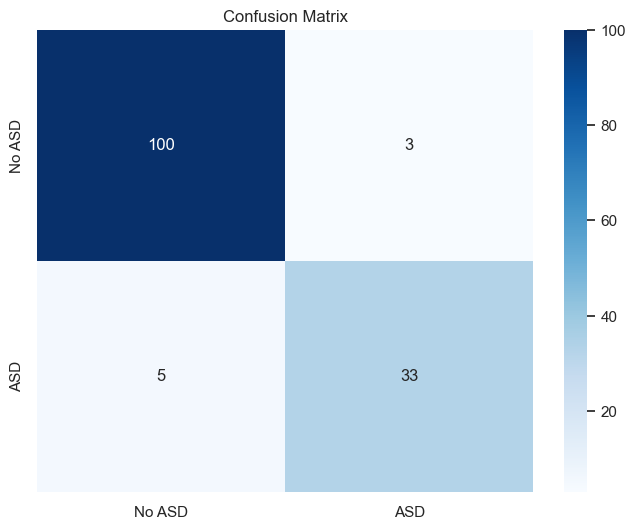

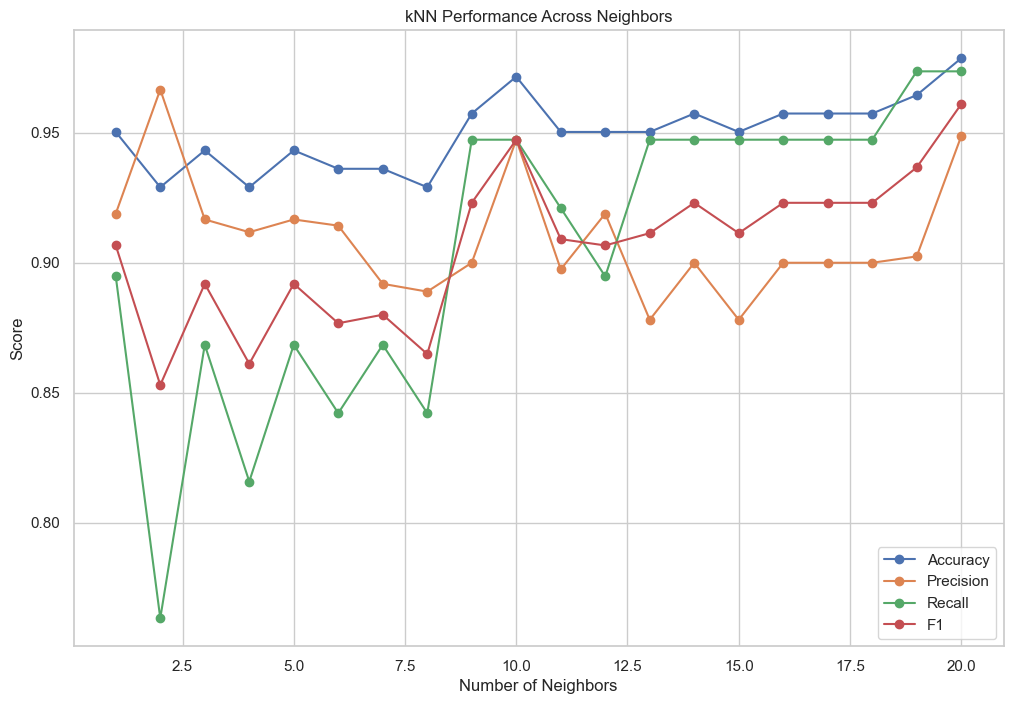

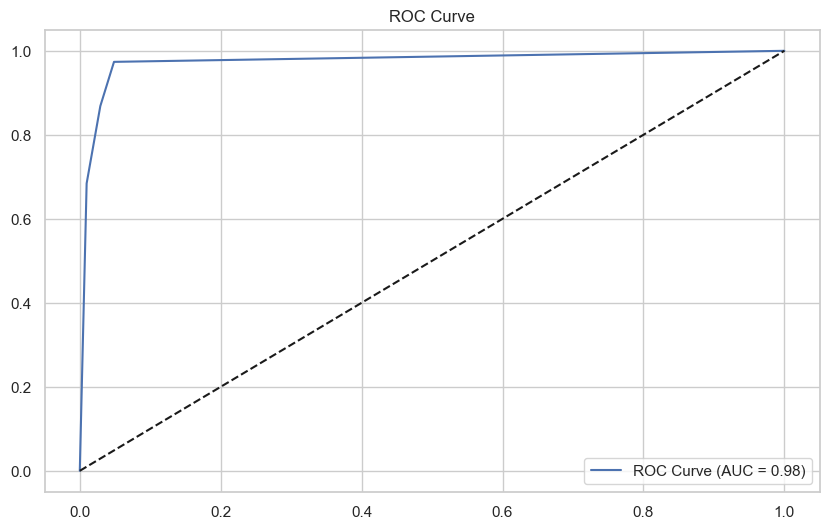

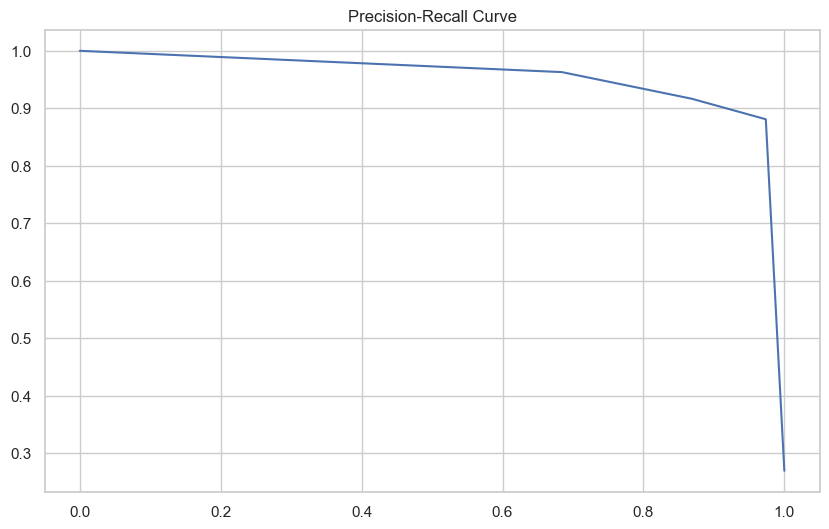

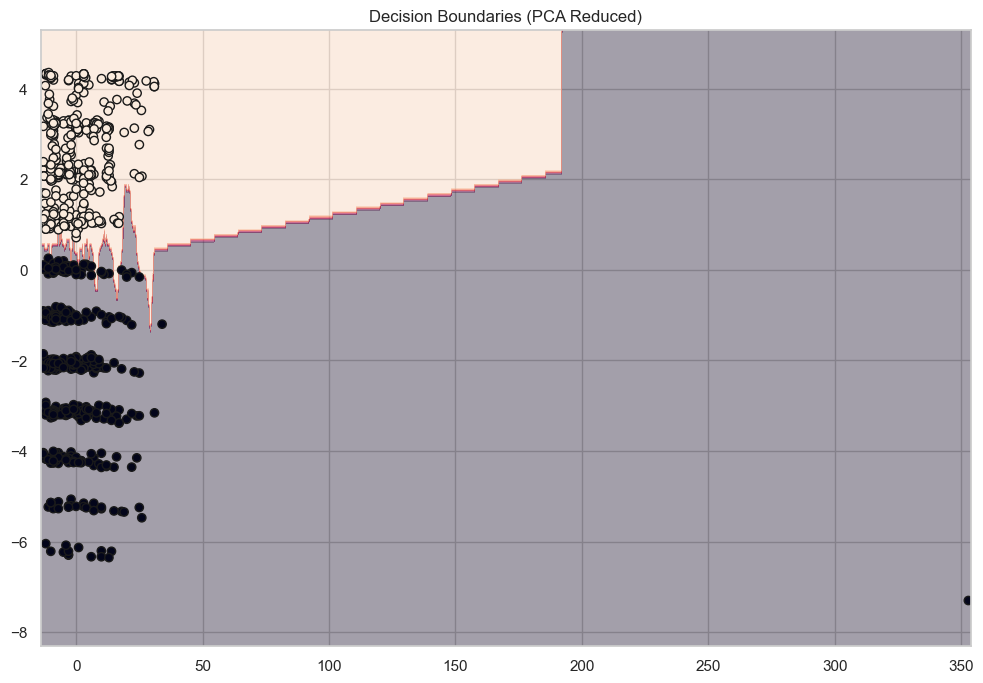

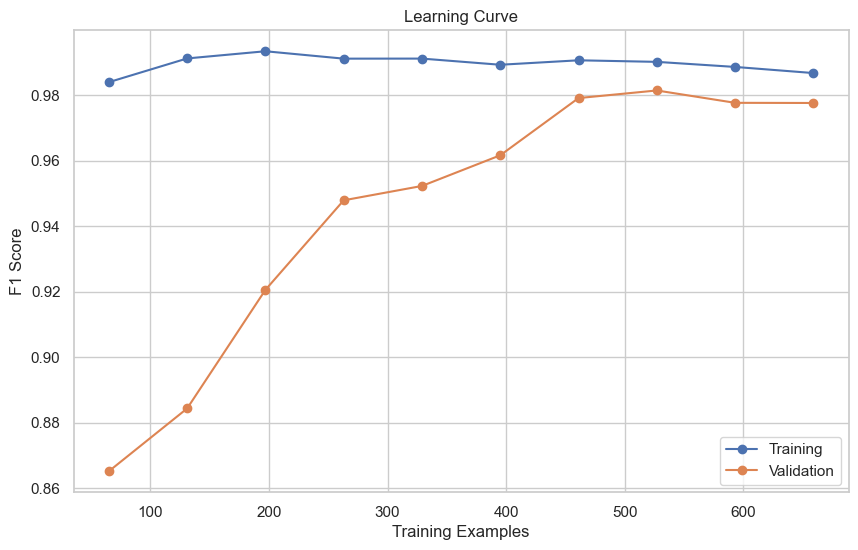


Validation Checks:
Class Distribution - Original: 0.27
Train after SMOTE: 0.50
Test Set: 0.27


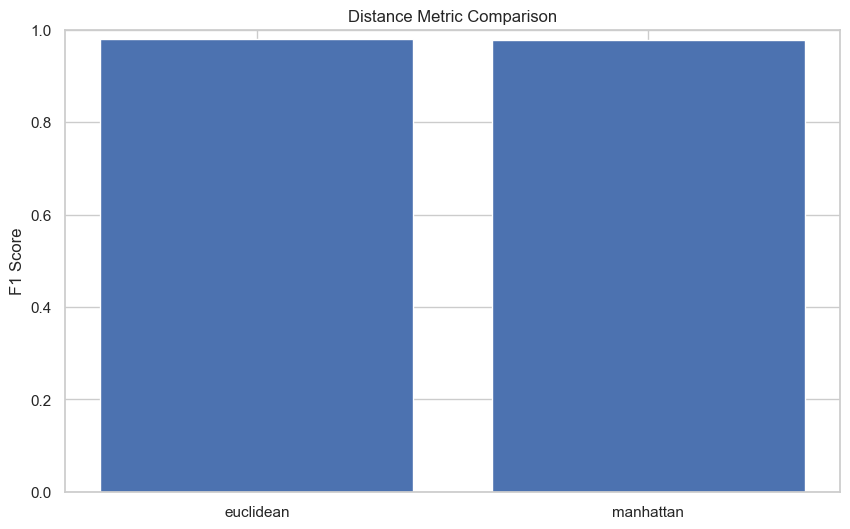


Overfitting Analysis:
Training F1: 0.99
Test F1: 0.89


In [31]:

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, precision_recall_curve,
                             make_scorer)
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("autism_data.csv")


data_classes = data['Class/ASD'].map({'YES': 1, 'NO': 0})
features_raw = data.drop('Class/ASD', axis=1)
features_final = pd.get_dummies(features_raw)


for col in features_final.select_dtypes(include=np.number).columns:
    features_final = features_final.fillna({col: features_final[col].median()})

for col in features_final.select_dtypes(include='object').columns:
    features_final[col].fillna(features_final[col].mode()[0], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(
    features_final, data_classes,
    test_size=0.2,
    stratify=data_classes,
    random_state=42
)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


f1_scorer = make_scorer(f1_score, pos_label=1, zero_division=0)
precision_scorer = make_scorer(precision_score, pos_label=1, zero_division=0)
recall_scorer = make_scorer(recall_score, pos_label=1, zero_division=0)


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_resampled, y_train_resampled)


y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]

print("Initial Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.2f}")


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=['No ASD', 'ASD'],
            yticklabels=['No ASD', 'ASD'])
plt.title("Confusion Matrix")
plt.show()


neighbors_range = range(1, 21)
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}

for n in neighbors_range:
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train_resampled, y_train_resampled)
    pred = model.predict(X_test)
    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred, zero_division=0))
    metrics['Recall'].append(recall_score(y_test, pred, zero_division=0))
    metrics['F1'].append(f1_score(y_test, pred, zero_division=0))

plt.figure(figsize=(12, 8))
for metric, values in metrics.items():
    plt.plot(neighbors_range, values, marker='o', label=metric)
plt.title("kNN Performance Across Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_resampled)
model_pca = KNeighborsClassifier(n_neighbors=3).fit(X_pca, y_train_resampled)

x_min, x_max = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
y_min, y_max = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, edgecolor='k')
plt.title("Decision Boundaries (PCA Reduced)")
plt.show()


scoring = {'precision': make_scorer(precision_score, pos_label=0),
           'recall': make_scorer(recall_score, pos_label=0),
           'f1': make_scorer(f1_score, pos_label=0)}

train_sizes, train_scores, val_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=3),
    X_train_resampled,
    y_train_resampled,
    cv=5,
    scoring=scoring['f1'], 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, 1), 'o-', label="Training")
plt.plot(train_sizes, np.mean(val_scores, 1), 'o-', label="Validation")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


print("\nValidation Checks:")
print(f"Class Distribution - Original: {data_classes.mean():.2f}")
print(f"Train after SMOTE: {y_train_resampled.mean():.2f}")
print(f"Test Set: {y_test.mean():.2f}")


metrics = ['euclidean', 'manhattan']
scores = []

for metric in metrics:
    model = KNeighborsClassifier(metric=metric)
    score = cross_val_score(model, X_train_resampled, y_train_resampled,
                           cv=5, scoring=f1_scorer).mean()
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.bar(metrics, scores)
plt.title("Distance Metric Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()


print("\nOverfitting Analysis:")
print(f"Training F1: {f1_score(y_train_resampled, knn_model.predict(X_train_resampled), zero_division=0):.2f}")
print(f"Test F1: {f1_score(y_test, y_pred, zero_division=0):.2f}")










In [32]:
global knn_results
knn_results = {
    'y_test': y_test,
    'y_proba': y_proba,
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, zero_division=0),
    'recall': recall_score(y_test, y_pred, zero_division=0),
    'f1': f1_score(y_test, y_pred, zero_division=0),
    'name': 'KNN',

    'confusion_matrix': confusion_matrix(y_test, y_pred),

}

### 6. Naive Bayes


Gaussian Naive Bayes Metrics:
Accuracy: 0.35
Precision: 0.29
Recall: 0.95
F1 Score: 0.44
CV F1 Scores: [0.34615385 0.49122807 0.56896552 0.46728972 0.38834951]
Mean CV F1: 0.45


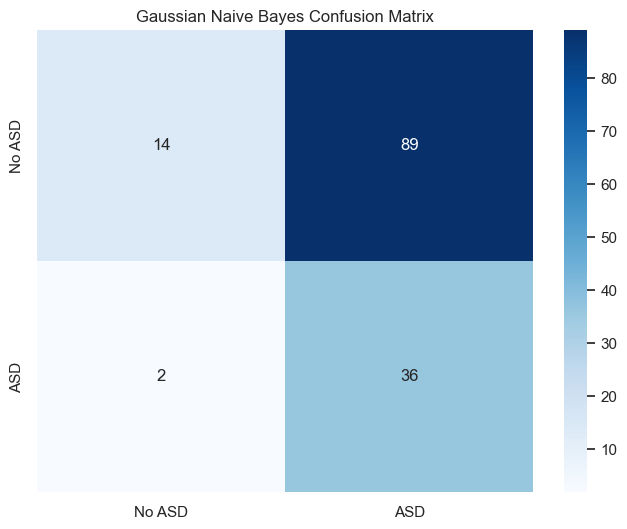


Complement Naive Bayes Metrics:
Accuracy: 0.91
Precision: 0.86
Recall: 0.79
F1 Score: 0.82


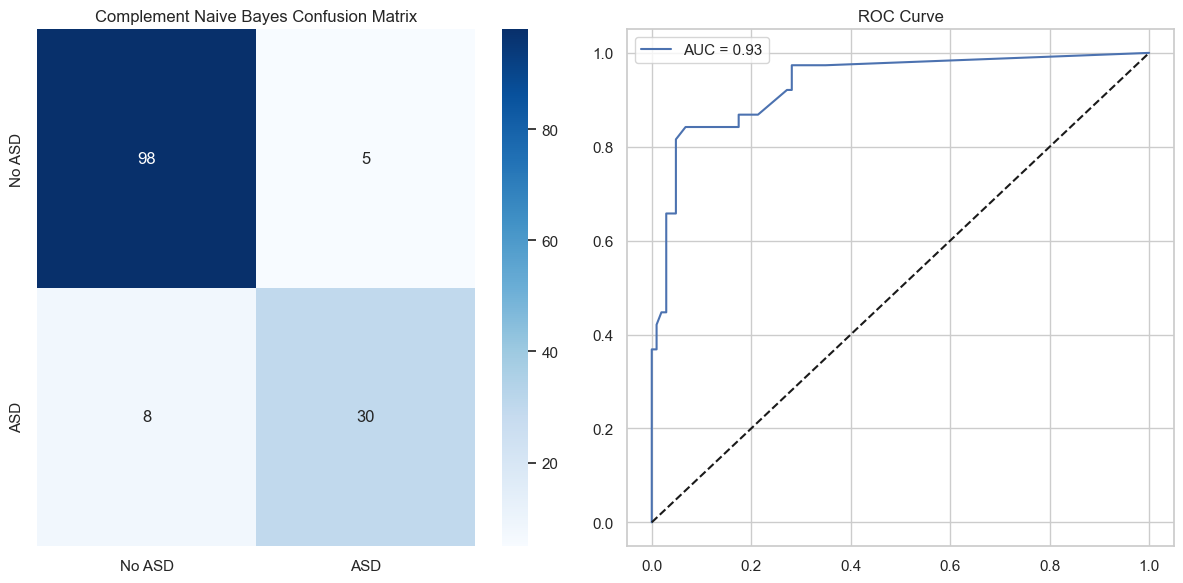

In [33]:
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


scoring = {'precision': make_scorer(precision_score, pos_label=0),
           'recall': make_scorer(recall_score, pos_label=0),
           'f1': make_scorer(f1_score, pos_label=0)}


nb_model_gnb = GaussianNB()
nb_model_gnb.fit(X_train_resampled, y_train_resampled)

gnb_cv_scores = cross_val_score(nb_model_gnb, X_train_resampled, y_train_resampled, cv=5, scoring=scoring['f1'])

y_pred_gnb = nb_model_gnb.predict(X_test)
y_proba_gnb = nb_model_gnb.predict_proba(X_test)[:, 1]

print("\nGaussian Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_gnb, zero_division=0):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_gnb, zero_division=0):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gnb, zero_division=0):.2f}")
print(f"CV F1 Scores: {gnb_cv_scores}")
print(f"Mean CV F1: {np.mean(gnb_cv_scores):.2f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt="d", cmap="Blues",
            xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'])
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()


nb_model_cnb = CalibratedClassifierCV(ComplementNB(force_alpha=True), method='isotonic', cv=5)


selector = VarianceThreshold(threshold=0.05)


nb_pipeline = Pipeline([
    ('selector', selector),
    ('model', nb_model_cnb)
])

nb_pipeline.fit(X_train_resampled, y_train_resampled)

y_pred_cnb = nb_pipeline.predict(X_test)
y_proba_cnb = nb_pipeline.predict_proba(X_test)[:,1]

print("\nComplement Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cnb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_cnb, zero_division=0):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_cnb, zero_division=0):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_cnb, zero_division=0):.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_cnb), annot=True, fmt="d", cmap="Blues",
            xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'])
plt.title("Complement Naive Bayes Confusion Matrix")

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba_cnb)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
global nb_results
nb_results = {
    'y_test': y_test,
    'y_proba': y_proba_cnb,
    'accuracy': accuracy_score(y_test, y_pred_cnb),
    'precision': precision_score(y_test, y_pred_cnb, zero_division=0),
    'recall': recall_score(y_test, y_pred_cnb, zero_division=0),
    'f1': f1_score(y_test, y_pred_cnb, zero_division=0),
    'name': 'Naive Bayes',

    'confusion_matrix': confusion_matrix(y_test, y_pred_cnb),
    'training_time': 0
}


### 7. Logistic Regression

Final Evaluation Metrics:
Accuracy: 0.77
Precision: 0.58
Recall: 0.39
F1 Score: 0.47


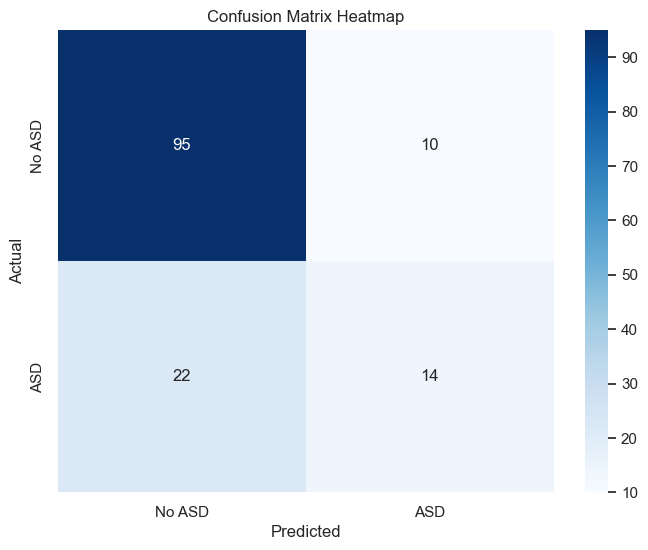


Cross-Validated F1 Scores: [0.40625    0.33333333 0.2173913  0.40540541 0.34482759]
Mean F1 Score: 0.34144152585869225

Best Parameters from Grid Search: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Evaluation Metrics for Best Model:
Accuracy: 0.75
Precision: 0.52
Recall: 0.39
F1 Score: 0.44


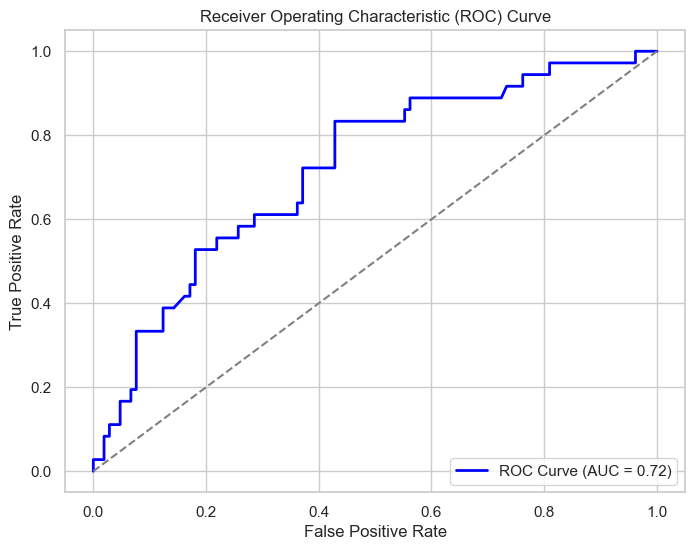

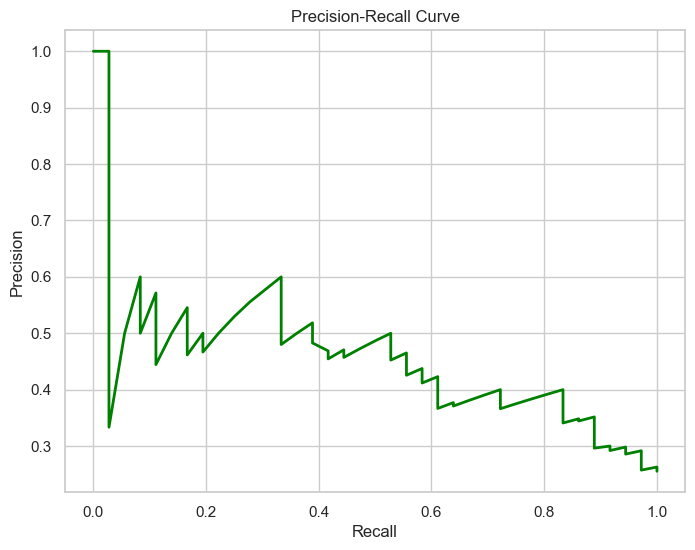

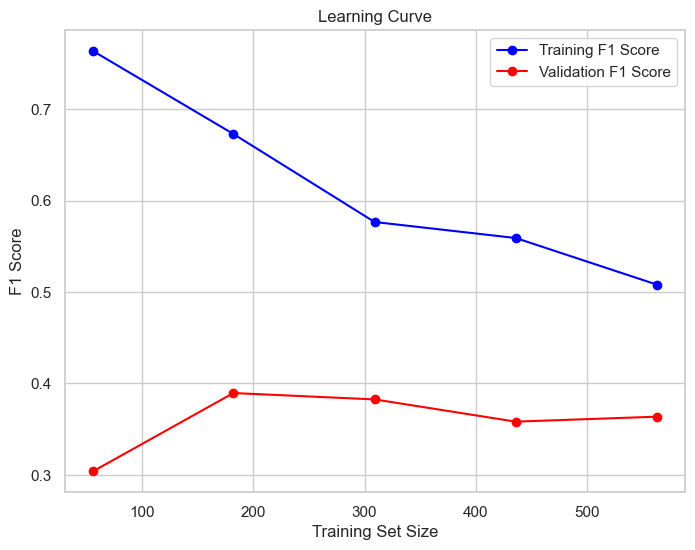

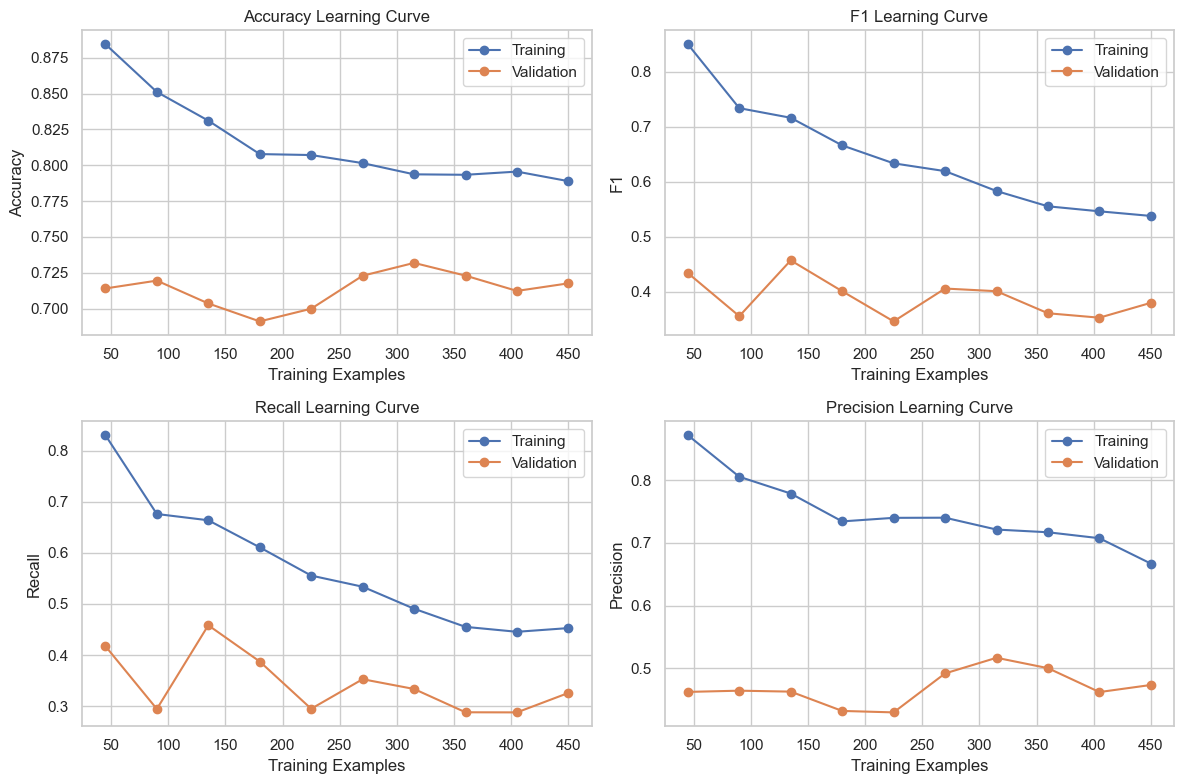

<Figure size 1200x600 with 0 Axes>

In [35]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("autism_data.csv")


X = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
          'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 
          'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 
          'A9_Score', 'A10_Score']]
y = data['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'relation']
numerical_cols = ['age'] 


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Increased max_iter for convergence
])


logreg_pipeline.fit(X_train, y_train)


y_pred = logreg_pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Final Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


cv_scores = cross_val_score(logreg_pipeline, X, y, cv=5, scoring="f1")
print("\nCross-Validated F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear']  # Solver for L1/L2 penalties
}

grid_search = GridSearchCV(logreg_pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid_search.best_params_)
best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test)
print("\nEvaluation Metrics for Best Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.2f}")


if best_model.named_steps['classifier'].penalty == 'l2':
    feature_names = numerical_cols + list(best_model.named_steps['preprocessor']
                              .named_transformers_['cat']
                              .named_steps['onehot']
                              .get_feature_names_out(categorical_cols))
    coefficients = best_model.named_steps['classifier'].coef_[0]
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, roc_curve, auc, precision_recall_curve,
                             classification_report)
from sklearn.model_selection import learning_curve




y_probs = best_model.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


if best_model.named_steps['classifier'].penalty == 'l2':
    feature_names = numerical_cols + list(best_model.named_steps['preprocessor']
                              .named_transformers_['cat']
                              .named_steps['onehot']
                              .get_feature_names_out(categorical_cols))
    coefficients = best_model.named_steps['classifier'].coef_[0]
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance['Coefficient'][:10], y=feature_importance['Feature'][:10], palette='coolwarm')
    plt.title("Top 10 Most Important Features")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()


train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='f1', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training F1 Score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation F1 Score')
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

from sklearn.model_selection import StratifiedKFold



from sklearn.model_selection import learning_curve


metrics = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision'
}

plt.figure(figsize=(12, 8))


for idx, (metric_name, metric_scorer) in enumerate(metrics.items(), 1):
    train_sizes, train_scores, test_scores = learning_curve(
        best_model,
        X_train,
        y_train,
        cv=StratifiedKFold(5),
        scoring=metric_scorer,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        verbose=0
    )
    

    plt.subplot(2, 2, idx)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation')
    plt.title(f'{metric_name.capitalize()} Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel(metric_name.capitalize())
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))


metric_style = {
    'accuracy': ('blue', 'o'),
    'f1': ('green', 's'),
    'recall': ('red', 'D'),
    'precision': ('purple', '^')
}

for metric_name, metric_scorer in metrics.items():
    train_sizes, train_scores, val_scores = learning_curve(
        best_model,
        X_train,
        y_train,
        cv=StratifiedKFold(5),
        scoring=metric_scorer,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        verbose=0
    )
    
    color, marker = metric_style[metric_name]
  







In [36]:
global lr_results
lr_results = {
    'y_test': y_test,
    'y_proba': y_probs,
    'accuracy': accuracy_score(y_test, y_pred_best),
    'precision': precision_score(y_test, y_pred_best),
    'recall': recall_score(y_test, y_pred_best),
    'f1': f1_score(y_test, y_pred_best),
    'name': 'Logistic Regression',

    'confusion_matrix': confusion_matrix(y_test, y_pred_best),
    'training_time': 0,
    'learning_curve': {
        'train_sizes': train_sizes,
        'train_scores': train_mean,
        'val_scores': test_mean
    }
}

In [37]:
def get_feature_importance(model, feature_names=None):
    """Extract feature importance from different model types"""
    try:
        if hasattr(model, 'feature_importances_'):
            return pd.DataFrame({
                'Feature': feature_names if feature_names else [],
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False)
        elif hasattr(model, 'coef_'):
            return pd.DataFrame({
                'Feature': feature_names if feature_names else [],
                'Importance': np.abs(model.coef_[0])
            }).sort_values('Importance', ascending=False)
    except Exception as e:
        print(f"Feature importance error: {str(e)}")
    return pd.DataFrame()


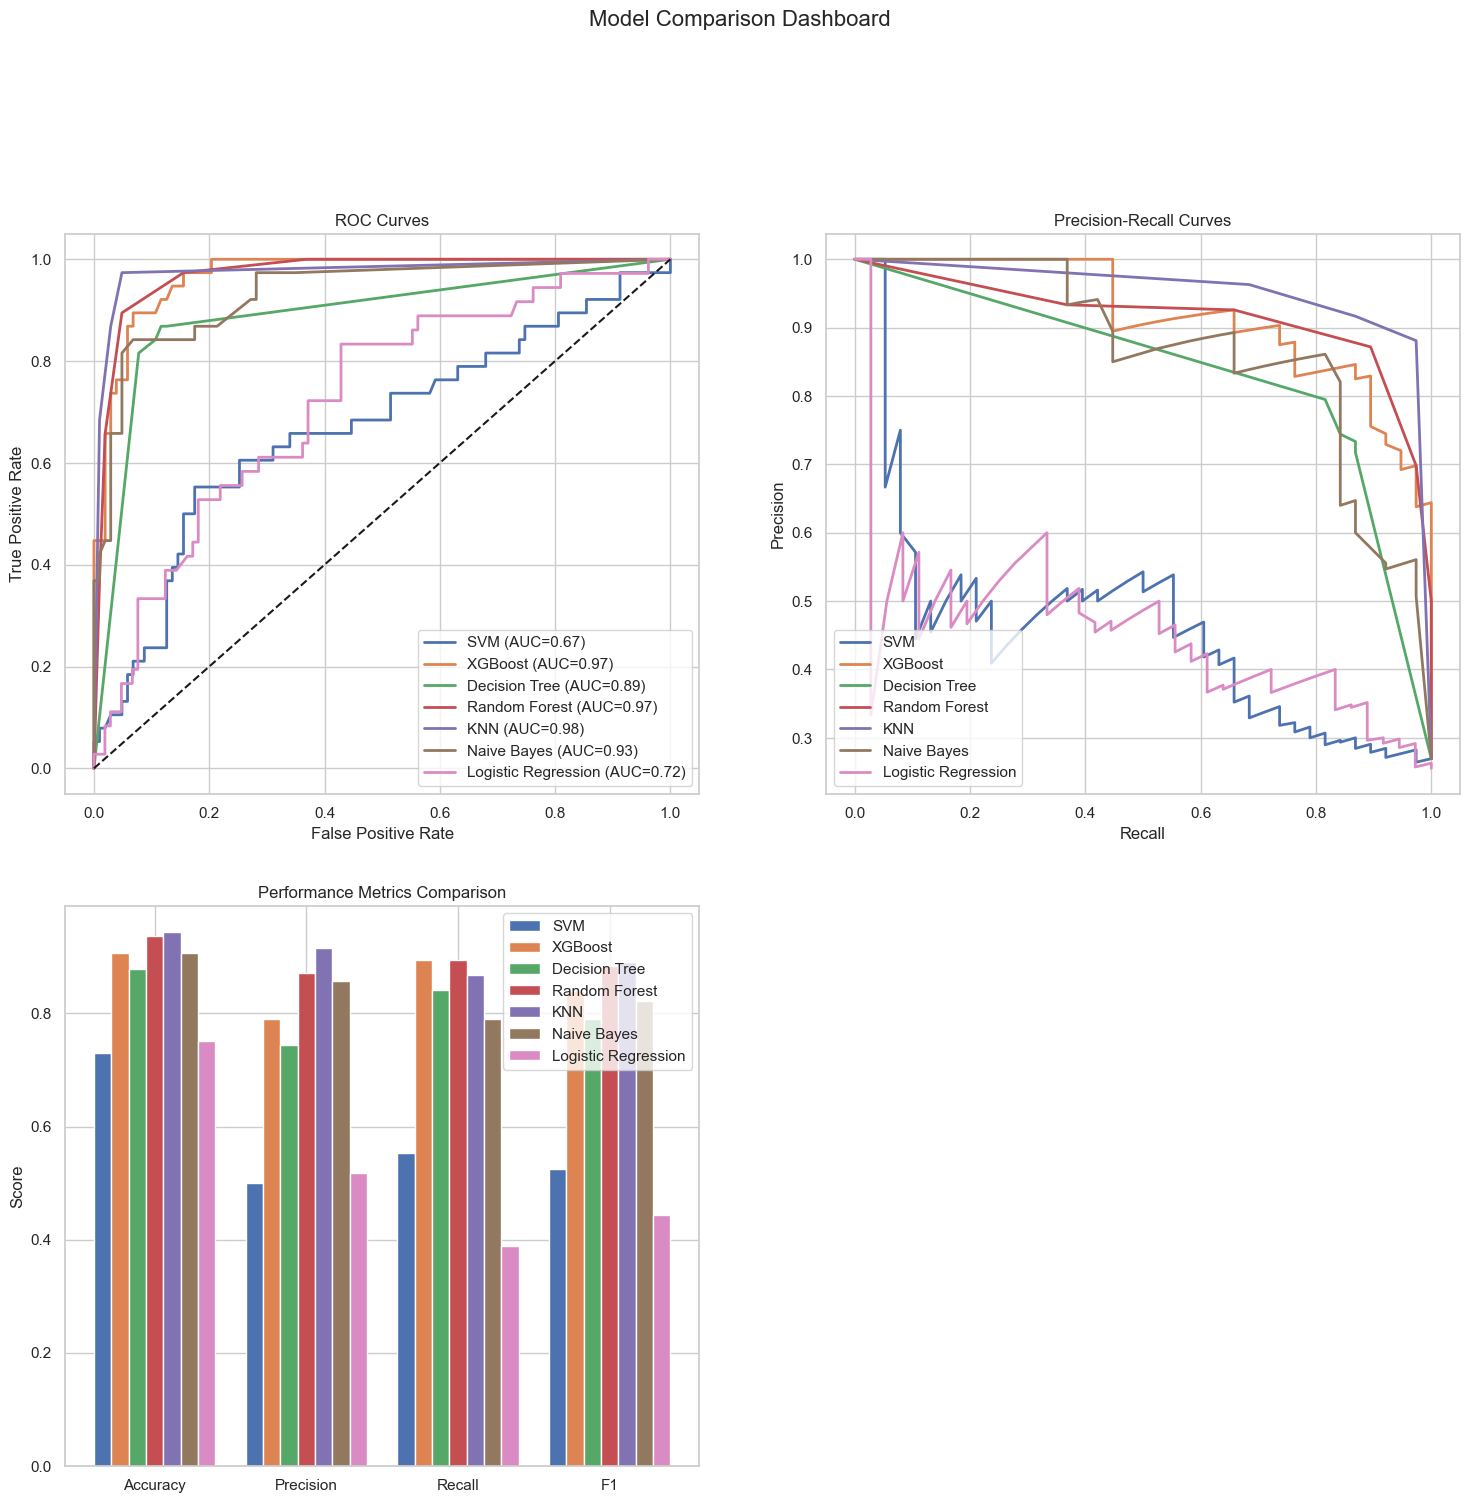

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

def compare_models(models_data, model_names):
    """Compare multiple models visually using key metrics and curves"""
    plt.figure(figsize=(18, 16))
    plt.suptitle("Model Comparison Dashboard", y=1.02, fontsize=16)

    # 1. ROC Curves
    plt.subplot(2, 2, 1)
    for model_info, name in zip(models_data, model_names):
        y_test = model_info['y_test']
        y_proba = model_info['y_proba']
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')

    # 2. Precision-Recall Curves
    plt.subplot(2, 2, 2)
    for model_info, name in zip(models_data, model_names):
        y_test = model_info['y_test']
        y_proba = model_info['y_proba']
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, lw=2, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend()

    # 3. Metric Comparison Bar Chart
    plt.subplot(2, 2, 3)
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    scores = {name: [] for name in model_names}
    
    for model_info in models_data:
        scores[model_info['name']].extend([
            model_info['accuracy'],
            model_info['precision'],
            model_info['recall'],
            model_info['f1']
        ])
    
    x = np.arange(len(metrics))
    width = 0.8 / len(model_names)
    
    for idx, name in enumerate(model_names):
        plt.bar(x + idx * width, scores[name], width, label=name)
    
    plt.xticks(x + width * (len(model_names) - 1) / 2, metrics)
    plt.ylabel('Score')
    plt.title('Performance Metrics Comparison')
    plt.legend()



models_data = [
    {
        'y_test': y_test,
        'y_proba': best_model.predict_proba(X_test_preprocessed)[:,1],
        'accuracy': accuracy_score(y_test, y_pred_best),
        'precision': precision_score(y_test, y_pred_best),
        'recall': recall_score(y_test, y_pred_best),
        'f1': f1_score(y_test, y_pred_best),
        'name': 'SVM'
    },
    {
        'y_test': y_test,
        'y_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'name': 'XGBoost',
    },

    # Decision Tree
    dt_results,
    
    # Random Forest
    rf_results,
    
    # KNN, Naive Bayes, Logistic Regression
    knn_results, nb_results, lr_results
]

model_names = [m['name'] for m in models_data]

# Execute comparison
compare_models(models_data, model_names)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4835 - loss: 2.7796 - val_accuracy: 0.6333 - val_loss: 2.0138 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 2.4563 - val_accuracy: 0.6083 - val_loss: 1.9310 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5801 - loss: 2.3177 - val_accuracy: 0.6500 - val_loss: 1.8653 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5711 - loss: 2.2371 - val_accuracy: 0.7167 - val_loss: 1.7927 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5827 - loss: 2.1970 - val_accuracy: 0.7667 - val_loss: 1.7282 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6449 - loss: 1.9876 - val_accuracy: 0.8083 - val_loss: 1.6680 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6248 - loss: 1.9499 - val_ac

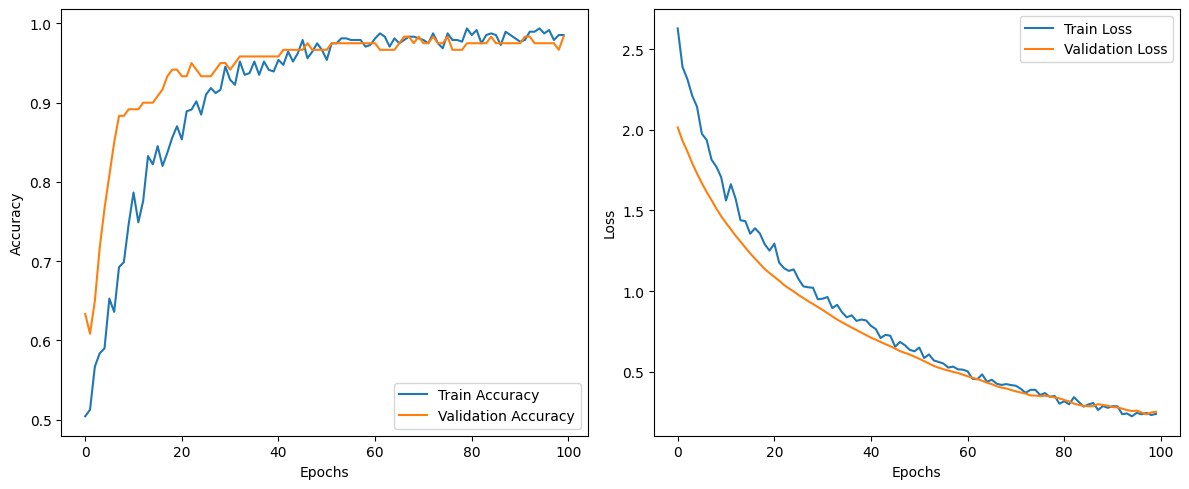

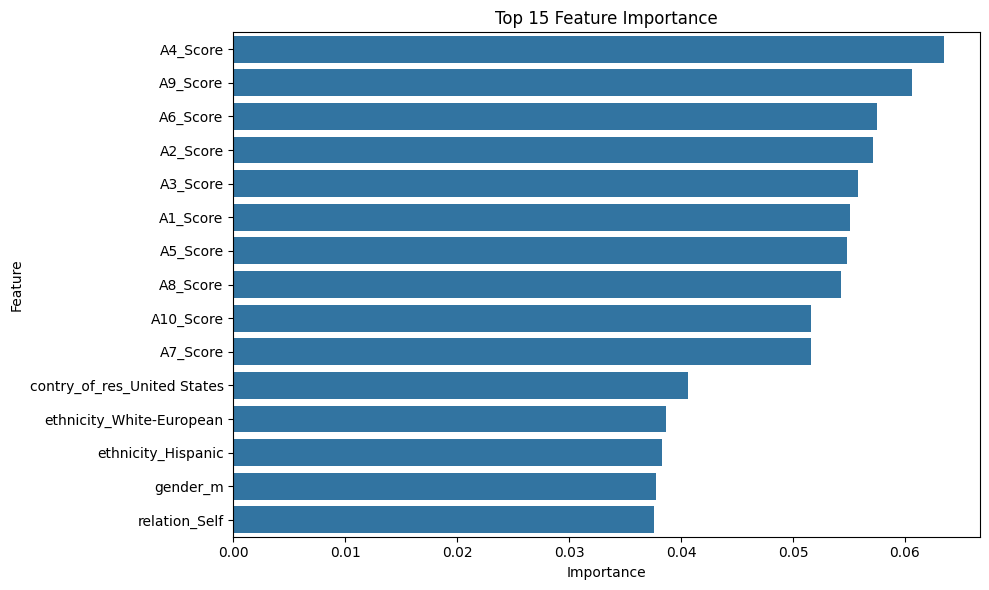

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
data = pd.read_csv("autism_data.csv")

# Preprocessing
le = LabelEncoder()
data['Class/ASD'] = le.fit_transform(data['Class/ASD'])

# Remove potential leakage features
leakage_features = ['result', 'sum_of_scores']
data = data.drop(columns=[col for col in leakage_features if col in data.columns])

# Handle missing values
data = data.replace('?', np.nan)
data.fillna(data.mode().iloc[0], inplace=True)

# Extract features and target
X_raw = data.drop(columns=['Class/ASD'])
y = data['Class/ASD'].values

# First split to create a true holdout test set
X_dev, X_holdout, y_dev, y_holdout = train_test_split(X_raw, y, test_size=0.15, random_state=42, stratify=y)

# Process categorical columns
potential_leakage_cols = ['age_desc', 'used_app_before']
categorical_cols = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'relation']

X_dev = pd.get_dummies(X_dev.drop(columns=potential_leakage_cols), columns=categorical_cols, drop_first=True)
X_holdout = pd.get_dummies(X_holdout.drop(columns=potential_leakage_cols), columns=categorical_cols, drop_first=True)
X_holdout = X_holdout.reindex(columns=X_dev.columns, fill_value=0)

# Feature normalization
scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(X_dev)
X_holdout_scaled = scaler.transform(X_holdout)

# Split development data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_dev_scaled, y_dev, test_size=0.2, random_state=42, stratify=y_dev)

# Deep Neural Network Model
def create_dnn_model(input_dim, dropout_rate=0.4, l2_reg=0.01):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile model
model = create_dnn_model(input_dim=X_train.shape[1])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Class weights to address imbalance
class_weight = {0: 1.0, 1: 1.5}

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight,
    verbose=1
)

# Evaluate model on validation and holdout sets
def evaluate_model(X, y, set_name):
    y_probs = model.predict(X)
    y_pred = (y_probs > 0.5).astype(int)
    print(f"\n{set_name} Set Metrics:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.2f}")
    print(f"Precision: {precision_score(y, y_pred):.2f}")
    print(f"Recall: {recall_score(y, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y, y_pred):.2f}")

evaluate_model(X_val, y_val, "Validation")
evaluate_model(X_holdout_scaled, y_holdout, "Holdout Test")





# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix


# ROC Curve


# Feature importance analysis
feature_importance_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.layers[1].output
)

feature_importance = np.abs(feature_importance_model.get_weights()[0]).mean(axis=1)
feature_names = X_dev.columns

# Plot top features
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False).head(15)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 15 Feature Importance')
plt.tight_layout()
plt.show()
